In [121]:
from sklearn.tree import DecisionTreeClassifier      ## 載入機器學習函示庫
import os
from graphviz import Source
from sklearn.tree import export_graphviz
import numpy as np 
import pandas as pd
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [122]:
from google.colab import files       ##上傳資料集
Data = files.upload()

Saving credit.csv to credit (4).csv


In [123]:
credird_data = pd.read_csv('./credit.csv')    ##讀取資料集

In [124]:
credird_data                     #顯示資料集

,age,work,house,credit,category
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [125]:
cols=['age','work','house','credit',           #選取資料集特徵
        ]     

In [126]:
frame1 = pd.DataFrame(credird_data)          #結構化資料集

In [127]:
frame1                        #顯示結構化資料集

,age,work,house,credit,category
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [128]:
credird_data['age'] = frame['age'].map({'青年':0,'中年':1,'老年':2}).astype(int)            #對特定特徵進行編碼以及清洗不必要的特徵
credird_data['work'] = frame['work'].map({'否':0,'是':1,}).astype(int)
credird_data['house'] = frame['house'].map({'否':0,'是':1,}).astype(int)
credird_data['credit'] = frame['credit'].map({'一般':0,'好':1,'非常好':2}).astype(int)
credird_data = credird_data.drop(['category'],axis=1)

In [129]:
frame1   #顯示編碼後資料集                    

,age,work,house,credit,category
0,0,0,0,0,否
1,0,0,0,1,否
2,0,1,0,1,是
3,0,1,1,0,是
4,0,0,0,0,否
5,1,0,0,0,否
6,1,0,0,1,否
7,1,1,1,1,是
8,1,0,1,2,是
9,1,0,1,2,是


In [130]:
frame2 = pd.DataFrame(credird_data)    #結構化編碼後資料集  

In [131]:
frame2                    #顯示結構化編碼後資料集 

,age,work,house,credit
0,0,0,0,0
1,0,0,0,1
2,0,1,0,1
3,0,1,1,0
4,0,0,0,0
5,1,0,0,0
6,1,0,0,1
7,1,1,1,1
8,1,0,1,2
9,1,0,1,2


In [132]:
df4 = frame1['category'].map({'否':0,'是':1,}).astype(int)   #提取資料集標籤

In [147]:
targename=['是','否']   #提取資料集標籤

In [148]:
array1 = df4.values   ##將標籤矩陣化

In [149]:
data1 = (frame2)  #選取決策資料

In [150]:
data1.values     #將決策資料矩陣化

array([[0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 1, 1, 1],
       [1, 0, 1, 2],
       [1, 0, 1, 2],
       [2, 0, 1, 2],
       [2, 0, 1, 1],
       [2, 1, 0, 1],
       [2, 1, 0, 2],
       [2, 0, 0, 0]])

In [151]:
X = data1    
y = array1



In [153]:
tree_clf = DecisionTreeClassifier(max_depth = 10, random_state=60)    #產生決策樹
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=60, splitter='best')

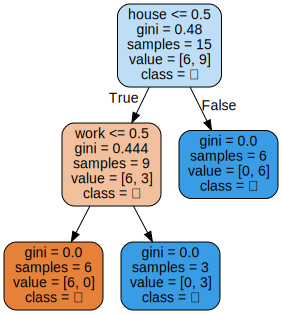

In [154]:
export_graphviz(tree_clf,
        out_file=os.path.join(IMAGES_PATH, "credit_tree.dot"),
        feature_names=cols,
        class_names=targename,    
        rounded=True,
        filled=True)

Source.from_file(os.path.join(IMAGES_PATH, "credit_tree.dot"))            #繪製決策樹